In [8]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from FMCD_y_MCM import mcd, mcm, mcd_3
from FReconstrucciondeseñalesapartirdemuestras import h

### 𝑥a (t) = 5 𝑠𝑖𝑛(1400π𝑡) − 5 𝑠𝑖𝑛 (750π𝑡 − 𝜋/6) + 5 cos (250π𝑡 + 𝜋/4) − 𝑐𝑜𝑠 (700𝜋𝑡 + 𝜋/3)

### 𝑥a (t) = 5 𝑠𝑖𝑛(700 * 2πt) − 5 𝑠𝑖𝑛 (375 * 2πt − 𝜋/6) + 5 cos (125 * 2πt + 𝜋/4) − 𝑐𝑜𝑠 (350 * 2𝜋t + 𝜋/3)

- - -

        Apartado A

In [9]:
frec1 = mcd (700,375)

frec2 = mcd (frec1,125)

frec3 = mcd (frec2,350)

print ("La frecuencia de la señal resultante es:", frec3)
print ("El período resultante es: ", 1/frec3)

La frecuencia de la señal resultante es: 25
El período resultante es:  0.04


        Para muestrear la señal tomaría una frecuencia de muestreo Fs > 1400 Hz para evitar ALIASING.

- - -

        Apartado B

        Considerando Fs = 700 Hz.
        
        Reemplazo "n" por "t/Fs".

        𝑥a (n) = 5 𝑠𝑖𝑛((700/700) * 2πn) − 5 𝑠𝑖𝑛 ((375/700) * 2πn − 𝜋/6) + 5 cos ((125/700) * 2πn + 𝜋/4) − 𝑐𝑜𝑠 ((350/700) * 2𝜋n + 𝜋/3)
        
        𝑥a (n) = 5 𝑠𝑖𝑛(2πn) − 5 𝑠𝑖𝑛 ((15/28) * 2πn − 𝜋/6) + 5 cos ((5/28) * 2πn + 𝜋/4) − 𝑐𝑜𝑠 ((1/2) * 2𝜋n + 𝜋/3)

        𝑥a (n) = − 5 𝑠𝑖𝑛 ((15/28) * 2πn − 𝜋/6) + 5 cos ((5/28) * 2πn + 𝜋/4) − 𝑐𝑜𝑠 ((1/2) * 2𝜋n + 𝜋/3)

        Las frecuencias relativas son: 

        F1 = 15/28
        F2 = 5/28
        F3 = 1/2

- - -

        Apartado C

        Para encontrar ya (t) reemplazo en x(n) ---> "n" por "t * Fs"

        ya (t) = − 5 𝑠𝑖𝑛 (375 * 2πt − 𝜋/6) + 5 cos (125 * 2πn + 𝜋/4) − 𝑐𝑜𝑠 (350 * 2𝜋n + 𝜋/3)

In [10]:
#REPRESENTO xa (t)
t = np.arange(0,1,0.00001)
x_a = 5*np.sin(700*2*np.pi*t) - 5*np.sin((375*2*np.pi*t)-(np.pi/6)) +  5*np.cos((125*2*np.pi*t) + (np.pi/4)) - np.cos((350*2*np.pi*t) + (np.pi/3))

In [11]:
#REPRESENTO x(n)
Fs = 700
n = np.arange(len(t))
xn = 5*np.sin(((15/28)*2*np.pi*n)-(np.pi/6)) + 5*np.cos(((5/28)*2*np.pi*n) + (np.pi/4)) - np.cos(((1/2)*2*np.pi*n) + (np.pi/3))

In [12]:
#REPRESENTO SEÑAL RECONSTRUIDA
xrec1 = h(1000,10000,xn[0:1000],700) # h(n, Fs1, datos, Fs) ... Fs >> Fs1
t1 = np.arange(len(xrec1))/10000

<string>:9: RuntimeWarning: invalid value encountered in double_scalars


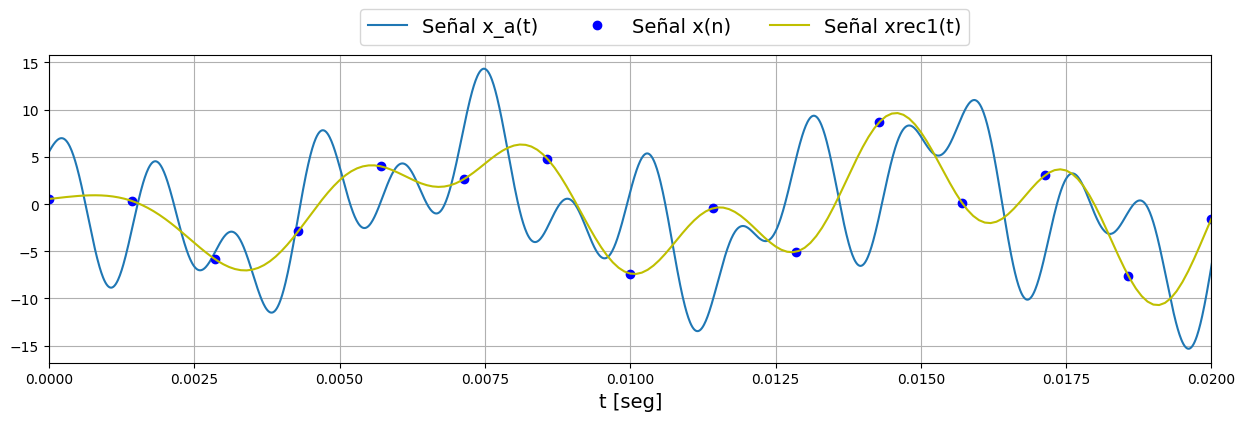

In [13]:
plt.figure(figsize=(15,4))
plt.plot(t,x_a)
plt.plot(n/Fs,xn,'o',c='b')
plt.plot(t1,xrec1,'y')
plt.grid()
plt.xlabel('t [seg]', fontsize=14)
plt.legend(('Señal x_a(t)','Señal x(n)','Señal xrec1(t)'),prop={'size':14},ncol=4,bbox_to_anchor=(0.8,1.18))
plt.xlim(0,0.02)
plt.show()

- - -

        Apartado D

In [14]:
#Para ver dónde es el máximo, la posición de n

np.where(xn[0:20] == np.max(xn[0:20]))

(array([10]),)

In [15]:
np.max(xn[0:20]) #este es el valor máximo (la amplitud)

8.677775127267063

- - -